In [1]:
import os
os.chdir("..")

In [2]:
from dataset.google_dataset import *

Better speed can be achieved with apex installed from https://www.github.com/nvidia/apex.


In [3]:
train = GoogleDatasetBertPickle(GoogleDatasetBertPickle.BERT_PICKLED_TRAIN)

In [4]:
len(train)

7000

In [5]:
train_features, train_labels = train.for_sklearn()

In [6]:
train[0][0].shape

(768,)

In [7]:
validation = GoogleDatasetBertPickle(GoogleDatasetBertPickle.BERT_PICKLED_VALIDATION)

In [8]:
len(validation)

1500

In [9]:
validation_features, validation_labels = validation.for_sklearn()

In [10]:
test = GoogleDatasetBertPickle(GoogleDatasetBertPickle.BERT_PICKLED_TEST)

In [11]:
len(test)

1500

In [12]:
test_features, test_labels = test.for_sklearn()

In [15]:
Counter(test_labels)

Counter({0: 1095, 1: 405})

In [14]:
from collections import Counter

In [16]:
Counter(train_labels)

Counter({1: 1890, 0: 5110})

In [18]:
from sklearn.svm import SVC

In [19]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score

In [30]:
for kernel in ["linear", "poly", "rbf"]:
    for class_weight in [None, "balanced"]:
        for C in [0.1, 1, 10]:
            model = SVC(C=C, kernel=kernel, class_weight=class_weight, gamma="scale").fit(train_features, train_labels)
            validation_predictions = model.predict(validation_features)
            accuracy = accuracy_score(validation_labels, validation_predictions)
            balanced_accuracy = balanced_accuracy_score(validation_labels, validation_predictions)
            print(f"kernel:{kernel}, class_weight:{class_weight}, C:{C},  => accuracy:{accuracy}, balanced_accuracy:{balanced_accuracy}")
            #print(Counter(validation_predictions))

kernel:linear, class_wight:None, C:0.1,  => accuracy:0.782, balanced_accuracy:0.649974632166413
kernel:linear, class_wight:None, C:1,  => accuracy:0.7793333333333333, balanced_accuracy:0.6745983426348723
kernel:linear, class_wight:None, C:10,  => accuracy:0.764, balanced_accuracy:0.6703196347031963
kernel:linear, class_wight:balanced, C:0.1,  => accuracy:0.7266666666666667, balanced_accuracy:0.7233214950109927
kernel:linear, class_wight:balanced, C:1,  => accuracy:0.724, balanced_accuracy:0.7137155420260444
kernel:linear, class_wight:balanced, C:10,  => accuracy:0.7166666666666667, balanced_accuracy:0.7079147640791477
kernel:poly, class_wight:None, C:0.1,  => accuracy:0.73, balanced_accuracy:0.5
kernel:poly, class_wight:None, C:1,  => accuracy:0.7706666666666667, balanced_accuracy:0.6048706240487062
kernel:poly, class_wight:None, C:10,  => accuracy:0.7826666666666666, balanced_accuracy:0.6745476069676983
kernel:poly, class_wight:balanced, C:0.1,  => accuracy:0.6973333333333334, balance

In [29]:
for class_weight in [None, "balanced"]:
    for C in [0.01, 0.1, 1, 5, 10, 50, 100, 1000]:
        for gamma in [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10]:
            model = SVC(C=C, kernel="rbf", gamma=gamma, class_weight=class_weight).fit(train_features, train_labels)
            validation_predictions = model.predict(validation_features)
            accuracy = accuracy_score(validation_labels, validation_predictions)
            balanced_accuracy = balanced_accuracy_score(validation_labels, validation_predictions)
            print(f"class_weight: {class_weight}, C:{C}, gamma:{gamma} => accuracy:{accuracy}, balanced_accuracy:{balanced_accuracy}")
            #print(Counter(validation_predictions))

class_weight: None, C:0.01, gamma:1e-05 => accuracy:0.73, balanced_accuracy:0.5
class_weight: None, C:0.01, gamma:0.0001 => accuracy:0.73, balanced_accuracy:0.5
class_weight: None, C:0.01, gamma:0.001 => accuracy:0.73, balanced_accuracy:0.5
class_weight: None, C:0.01, gamma:0.01 => accuracy:0.73, balanced_accuracy:0.5
class_weight: None, C:0.01, gamma:0.1 => accuracy:0.73, balanced_accuracy:0.5
class_weight: None, C:0.01, gamma:1 => accuracy:0.73, balanced_accuracy:0.5
class_weight: None, C:0.01, gamma:10 => accuracy:0.73, balanced_accuracy:0.5
class_weight: None, C:0.1, gamma:1e-05 => accuracy:0.73, balanced_accuracy:0.5
class_weight: None, C:0.1, gamma:0.0001 => accuracy:0.73, balanced_accuracy:0.5
class_weight: None, C:0.1, gamma:0.001 => accuracy:0.73, balanced_accuracy:0.5
class_weight: None, C:0.1, gamma:0.01 => accuracy:0.73, balanced_accuracy:0.5
class_weight: None, C:0.1, gamma:0.1 => accuracy:0.73, balanced_accuracy:0.5
class_weight: None, C:0.1, gamma:1 => accuracy:0.73, bal

class_weight: balanced, C:10, gamma:0.1 => accuracy:0.7566666666666667, balanced_accuracy:0.6411804498562489
class_weight: balanced, C:10, gamma:1 => accuracy:0.7306666666666667, balanced_accuracy:0.5027904616945713
class_weight: balanced, C:10, gamma:10 => accuracy:0.73, balanced_accuracy:0.5
class_weight: balanced, C:50, gamma:1e-05 => accuracy:0.6573333333333333, balanced_accuracy:0.658718078809403
class_weight: balanced, C:50, gamma:0.0001 => accuracy:0.7206666666666667, balanced_accuracy:0.7223236935565702
class_weight: balanced, C:50, gamma:0.001 => accuracy:0.7266666666666667, balanced_accuracy:0.7248773888043294
class_weight: balanced, C:50, gamma:0.01 => accuracy:0.754, balanced_accuracy:0.7124809741248097
class_weight: balanced, C:50, gamma:0.1 => accuracy:0.7573333333333333, balanced_accuracy:0.6416370708608151
class_weight: balanced, C:50, gamma:1 => accuracy:0.7306666666666667, balanced_accuracy:0.5027904616945713
class_weight: balanced, C:50, gamma:10 => accuracy:0.73, ba

In [27]:
for class_weight in [None, "balanced"]:
    for C in [0.001, 0.01, 0.1, 0.5, 1, 5, 10, 50, 100]:
        model = SVC(C=C, kernel="linear", class_weight=class_weight).fit(train_features, train_labels)
        validation_predictions = model.predict(validation_features)
        accuracy = accuracy_score(validation_labels, validation_predictions)
        balanced_accuracy = balanced_accuracy_score(validation_labels, validation_predictions)
        print(f"class_weight:{class_weight}, C:{C} => accuracy:{accuracy}, balanced_accuracy:{balanced_accuracy}")
        print(Counter(validation_predictions))

class_weight:None, C:0.001 => accuracy:0.73, balanced_accuracy:0.5
Counter({0: 1500})
class_weight:None, C:0.01 => accuracy:0.7393333333333333, balanced_accuracy:0.519617791307289
Counter({0: 1480, 1: 20})
class_weight:None, C:0.1 => accuracy:0.782, balanced_accuracy:0.649974632166413
Counter({0: 1284, 1: 216})
class_weight:None, C:0.5 => accuracy:0.7793333333333333, balanced_accuracy:0.6668188736681887
Counter({0: 1232, 1: 268})
class_weight:None, C:1 => accuracy:0.7793333333333333, balanced_accuracy:0.6745983426348723
Counter({0: 1212, 1: 288})
class_weight:None, C:5 => accuracy:0.7706666666666667, balanced_accuracy:0.6764417385421951
Counter({0: 1179, 1: 321})
class_weight:None, C:10 => accuracy:0.764, balanced_accuracy:0.6703196347031963
Counter({0: 1173, 1: 327})
class_weight:None, C:50 => accuracy:0.766, balanced_accuracy:0.6732453915102317
Counter({0: 1172, 1: 328})
class_weight:None, C:100 => accuracy:0.7666666666666667, balanced_accuracy:0.6752579063081345
Counter({0: 1169, 1:

In [20]:
model = SVC(class_weight="balanced", kernel="rbf", C=10, gamma=0.01, probability=True).fit(train_features, train_labels)

In [135]:
model_on_validation = SVC(class_weight="balanced", kernel="rbf", C=10, gamma=0.01).\
fit(np.row_stack((train_features, validation_features)), np.concatenate((train_labels, validation_labels)))

In [141]:
model_on_all = SVC(class_weight="balanced", kernel="rbf", C=10, gamma=0.01).\
fit(np.row_stack((train_features, validation_features, test_features)), np.concatenate((train_labels, validation_labels, test_labels)))

In [47]:
predictions = model.predict(validation_features)

In [136]:
model_on_validation_predictions = model_on_validation.predict(validation_features)

In [48]:
Counter(predictions)

Counter({1: 532, 0: 968})

In [49]:
Counter(validation_labels)

Counter({1: 405, 0: 1095})

In [50]:
accuracy_score(validation_labels, predictions)

0.7433333333333333

In [51]:
balanced_accuracy_score(validation_labels, predictions)

0.723845763571791

In [137]:
def evaluate(true_labels, predicted_labels):
    return accuracy_score(true_labels, predicted_labels), balanced_accuracy_score(true_labels, predicted_labels)

In [138]:
evaluate(validation_labels, model_on_validation_predictions)

(0.8713333333333333, 0.8900896330120074)

In [140]:
evaluate(train_labels, model_on_validation.predict(train_features))

(0.8727142857142857, 0.8813111545988259)

In [142]:
evaluate(test_labels, model_on_validation.predict(test_features))

(0.7513333333333333, 0.7293252156265855)

In [144]:
evaluate(test_labels, model_on_all.predict(test_features))

(0.86, 0.8706578724843566)

In [156]:
evaluate(test_labels, model.predict(test_features))

(0.75, 0.7229663453407746)

In [21]:
test_predictions = model.predict(test_features)

In [22]:
test_probabilites = model.predict_proba(test_features)

In [23]:
test_probabilites[:, 1]

array([0.04474162, 0.05304131, 0.58569738, ..., 0.20413106, 0.34489654,
       0.30871802])

In [24]:
import matplotlib.pyplot as plt

In [25]:
import seaborn as sns

In [26]:
import pandas as pd

In [27]:
data = pd.DataFrame(data={
    'Index of example': [i for i in range(len(test_labels))],
    'Predicted probability that example is REFUTED': test_probabilites[:, 1],
    'Correct label': ["SUPPORTED" if i == 0 else "REFUTED" for i in test_labels],
    'Predicted probability that example is SUPPORTED': test_probabilites[:, 0],
})

In [28]:
column_names = list(data.columns)

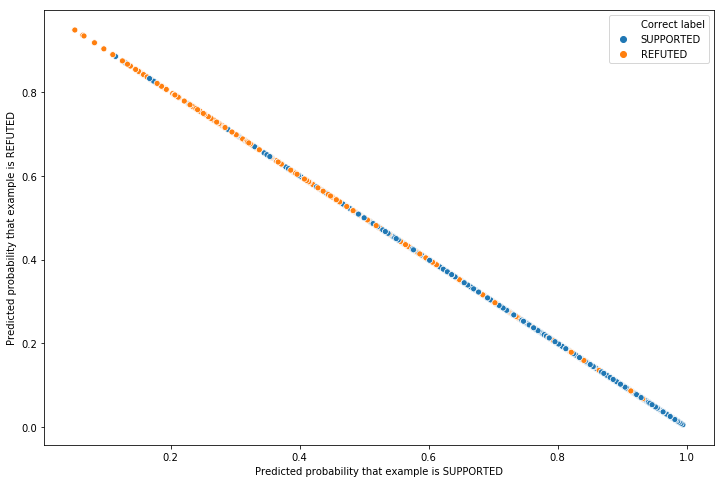

In [30]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=column_names[3], y=column_names[1],data=data, hue=column_names[2])

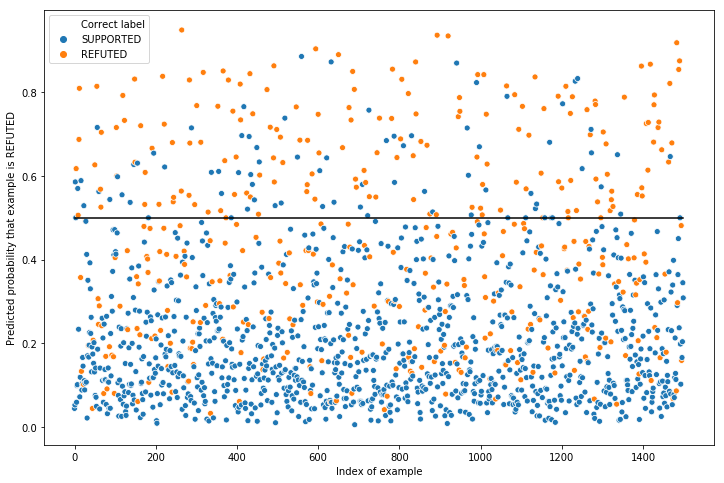

In [49]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=column_names[0], y=column_names[1],data=data, hue=column_names[2])
plt.plot([0, 1499], [0.5, 0.5], "k-")
plt.savefig("figura3.pdf",  bbox_inches = 'tight')

In [34]:
figura.get_figure().savefig("figura.png")

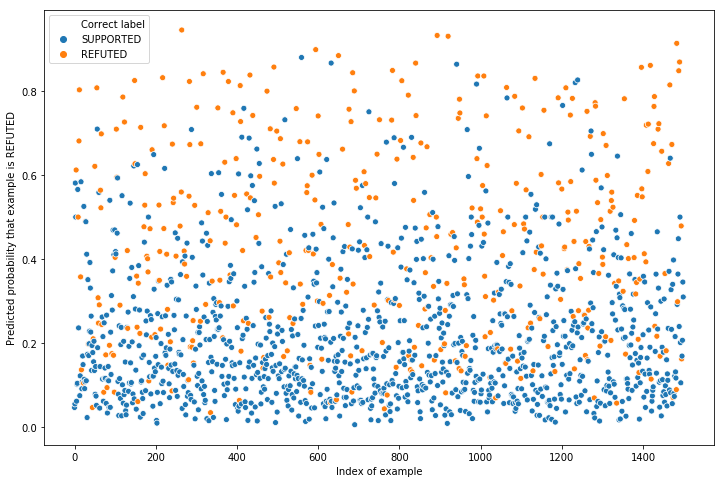

In [97]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=column_names[0], y=column_names[1],data=data, hue=column_names[2])

In [113]:
data[(data[column_names[2]]=="REFUTED") & (data[column_names[1]] < 0.1)].sort_values(by=column_names[1])

,Index of example,Predicted probability that example is REFUTED,Correct label
335,335,0.035122,REFUTED
763,763,0.044200,REFUTED
44,44,0.047343,REFUTED
1335,1335,0.057810,REFUTED
630,630,0.059907,REFUTED
156,156,0.061523,REFUTED
406,406,0.064320,REFUTED
645,645,0.065955,REFUTED
1280,1280,0.070160,REFUTED
1037,1037,0.070284,REFUTED


In [108]:
test_raw = GoogleDatasetRaw.from_pickle(GoogleDataset.TEST_DATA)

In [109]:
test_raw[44]

(('Steve Buscemi was in the movie Animal Factory',
  'Animal Factory Animal Factory is a 2000 crime drama film about life in prison, set in San Quentin. The film was directed by Steve Buscemi, and stars Willem Dafoe, Edward Animal Factory (2000) A young man goes to prison and a tough, older convict takes him under his wing as a mentor. Edward Bunker (novel), Edward Bunker (screenplay) Willem Dafoe, Edward Furlong, Danny Trejo. Animal Factory (2000) Animal Factory (2000) cast and crew credits, including actors, actresses, directors, writers and more. Steve Buscemi. Film Editing by Animal Factory (2000) Film.com. Top Critic. A picture about adapting one\'s instincts, and Mr. Buscemi\'s This Steve Buscemi directed crime drama is not of the same calibre as say, Animal Factory was his follow up to the very good character driven alcoholic INTERVIEW: Steve Buscemi Does Time; Directing “Animal Factory INTERVIEW: Steve Buscemi Does Time; Directing "Animal Factory" Buscemi shot the film in 29 da

In [110]:
test_raw[72]

(('The movie Dangerous Liaisons stars Keanu Reeves',
  'Dangerous Liaisons (1988) With Glenn Close, John Malkovich, Michelle Pfeiffer, Swoosie Kurtz. in Dangerous Liaisons (1988) John Malkovich and Peter Capaldi in Dangerous Liaisons in Dangerous Liaisons (1988) Keanu Reeves and Uma Thurman in Dangerous The only film that year nominated for Best Picture at the Academy Awards, and Dangerous Liaisons  Les Liaisons dangereuses  Dangerous Liaisons (1988) Dangerous Liaisons (1988) cast and crew credits, including actors, actresses, directors, writers and more. Keanu Reeves Chevalier Film Editing by Dangerous Liaisons Dangerous Liaisons is a 1988 American period romantic drama film directed by Stephen Frears It stars Glenn Close, John Malkovich, Michelle Pfeiffer, Swoosie Kurtz, Mildred Natwick, Peter Capaldi, Keanu Reeves and Uma Thurman. to Merteuil; Keanu Reeves as Le Chevalier Raphael Danceny, courtier to Cécile. Dangerous Liaisons Movie Review (1989) | Roger Ebert "Dangerous Liaisons" i

In [119]:
data[(data[column_names[2]]=="SUPPORTED") & (data[column_names[1]] > 0.8)].sort_values(by=column_names[1], ascending=False)

,Index of example,Predicted probability that example is REFUTED,Correct label
559,559,0.879415,SUPPORTED
632,632,0.866059,SUPPORTED
941,941,0.863307,SUPPORTED
1239,1239,0.825898,SUPPORTED
1233,1233,0.819494,SUPPORTED
990,990,0.816108,SUPPORTED


In [120]:
test_raw[559]

(('Paris Hilton is incapable of being a recording artist',
  'Paris (Paris Hilton album) Paris is the debut studio album by American media personality, actress and singer Paris Hilton. It was released on August 22, 2006 by Warner Bros. Records. The entire album was posted on AOL Music on August 14, 2006, becoming In August 2004, a low fidelity leak of Hilton\'s recording of the song circulated onto the Paris Hilton\'s New Song Rules, Just Like All Her Music (Seriously) ... Money Records recording artist and professional DJ Paris Hilton unleased the Hilton, Kim K\'s selfie affliction is monosyllabic and grossly incompetent. that she aspires to be a great musician or, barring that, a great artist. New Paris Hilton video proves she is incapable of an original idea Paris Hilton really, really wants to be recognized as an original world-famous artist with musical talent. Sadly, and to no one\'s surprise, she\'s not Paris Hilton on Her Music Career: \'I\'m More Talent Than Name Paris Hilton 

In [155]:
test_raw[632]

(('Ann Romney died April 16, 1949',
  "Ann Romney Ann Lois Romney (née Davies; born April 16, 1949) is the wife of American businessman and. Her mother converted just before her death in 1993. Her father Ann Romney  Marion G. Romney  Reflections from Ann Romney | LDS Living You wouldn't know it by looking at her today, but Ann Romney was once 100 Ann was born in Detroit, Michigan, on April 16, 1949, to Edward and Lois Many years later, her mother was also baptized, shortly before she passed away.) Michelle Obama and Ann Romney: Compare and contrast First lady Michelle Obama and Ann Romney at last week's presidential debate. Each is Born April 16, 1949 in Bloomfield Hills, Mich., Aries. The Political Graveyard: Romney family Relatives: Son of Hiram Thomas Gaskell Romney and Anna (Wood) Romney; brother of 1939, to Glady MacDonald (died 1943); father of Lenore Romney (who married George Wilcken. Born in Detroit, Wayne County, Mich., April 16, 1949. The Political Graveyard: Romney family o

In [89]:
GoogleDataset.LABEL_MAP

{'SUPPORTS': 0, 'REFUTES': 1, 'Unlabelled': -1}

In [53]:
Counter(test_predictions)

Counter({0: 992, 1: 508})

In [55]:
accuracy_score(test_labels, test_predictions)

0.75

In [56]:
balanced_accuracy_score(test_labels, test_predictions)

0.7229663453407746

In [23]:
baseline_prediction = [0 for i in test_labels]

In [24]:
Counter(baseline_prediction)

Counter({0: 1500})

In [25]:
accuracy_score(test_labels, baseline_prediction)

0.73

In [26]:
balanced_accuracy_score(test_labels, baseline_prediction)

0.5

In [16]:
import xgboost as xgb

In [17]:
model = xgb.XGBClassifier()

In [25]:
model.fit(train_features, train_labels, verbose=True)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [27]:
predictions = model.predict(validation_features)

In [28]:
Counter(predictions)

Counter({0: 1346, 1: 154})

In [29]:
accuracy_score(validation_labels, predictions)

0.7646666666666667

In [30]:
balanced_accuracy_score(validation_labels, predictions)

0.6038728225942838

In [145]:
import json

In [147]:
dominik_file = [json.loads(l) for l in open("test_set_fever_output.jsonl", "r")]

In [150]:
dominik_predictions = [d['predicted_label'] for d in dominik_file]

In [153]:
for i, d in enumerate(dominik_predictions):
    if d == "SUPPORTS":
        dominik_predictions[i] = 0
    elif d == "REFUTES":
        dominik_predictions[i] = 1
    else:
        dominik_predictions[i] = -1

In [154]:
evaluate(test_labels, dominik_predictions)

/home/marin/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')


(0.8833333333333333, 0.8539658379841029)